In [ ]:
!python -m spacy download el_core_news_sm

ERROR: Could not install packages due to an OSError: HTTPSConnectionPool(host='github.com', port=443): Max retries exceeded with url: /explosion/spacy-models/releases/download/el_core_news_sm-3.8.0/el_core_news_sm-3.8.0-py3-none-any.whl (Caused by ResponseError('too many 500 error responses'))



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [ ]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [ ]:
import spacy

In [ ]:
nlp = spacy.load('el_core_news_sm')

OSError: [E050] Can't find model 'el_core_news_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
to_vima_full_articles_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/tempi-data-analysis/articles.csv/to_vima_articles.csv")
to_vima_full_articles_df

Unnamed: 0                                        article_url  \
0             0  https://www.tovima.gr/2025/03/06/opinions/ster...   
1             1  https://www.tovima.gr/2025/03/06/politics/temp...   
2             2  https://www.tovima.gr/2025/03/06/politics/temp...   
3             3  https://www.tovima.gr/2025/03/06/society/tempi...   
4             4  https://www.tovima.gr/2025/03/05/society/tempi...   
..          ...                                                ...   
215         215  https://www.tovima.gr/2025/01/27/5-to-proi/5-t...   
216         216  https://www.tovima.gr/2025/01/26/politics/temp...   
217         217  https://www.tovima.gr/2025/01/26/politics/o-fa...   
218         218  https://www.tovima.gr/2025/01/26/society/tempi...   
219         219  https://www.tovima.gr/2025/01/26/society/tempi...   

                                                 title        date   time  \
0    «Στέρεψαν τα δάκρυα και έγιναν οργή» – Συλλαλη...  06-03-2025  21:13   
1    Τέμπη: Ο Κασσελάκης συνυπέγραψε μήνυση κατά Χρ...  06-03-2025  13:07   
2    Τέμπη – Κυβερνητικές πηγές: Αυτή είναι η αλήθε...  06-03-2025  12:40   
3    Τέμπη: Νέα συλλαλητήρια την Παρασκευή από φοιτ...  06-03-2025  10:37   
4    Τέμπη: Όσα έγιναν στα συλλαλητήρια σε όλη τη χώρα  05-03-2025  22:31   
..                                                 ...         ...    ...   
215                                                NaN         NaN    NaN   
216  Τέμπη: Επαφή Φάμελλου με Ανδρουλάκη, Χαρίτση, ...  26-01-2025  22:05   
217  Ο Φάμελλος φέρνει τον Μητσοτάκη στη Βουλή για ...  26-01-2025  18:13   
218  Τέμπη: Η ανακοίνωση της Αστυνομίας για το συλλ...  26-01-2025  17:53   
219  Τέμπη – Καρυστιανού: «Ξέρετε πόσος χρόνος είνα...  26-01-2025  15:01   

      section                 author  \
0      Γνώμες  Δημήτρης Ελαφρόπουλος   
1    Πολιτική               Newsroom   
2    Πολιτική               Newsroom   
3    Κοινωνία               Newsroom   
4    Κοινωνία               Newsroom   
..        ...                    ...   
215       NaN                    NaN   
216  Πολιτική               Newsroom   
217  Πολιτική               Newsroom   
218  Κοινωνία               Newsroom   
219  Κοινωνία               Newsroom   

                                                excert  \
0    Λίγες μέρες μετά τις μεγαλειώδεις συγκεντρώσει...   
1    «Απαιτούμε κάμερες στις στολές των αστυνομικών...   
2    Μαξίμου και Γεραπετρίτης απορρίπτουν τα περί e...   
3    Στις 12 το μεσημέρι σε Προπύλαια κι 'Αγαλμα Βε...   
4    Μαζικές συγκεντρώσεις για τους νεκρούς των Τεμ...   
..                                                 ...   
215                                                NaN   
216  Με αφορμή την τραγωδία στα Τέμπη, ο Σωκράτης Φ...   
217  Προ ημερήσιας συζήτηση για τα Τέμπη ζητά ο ΣΥΡ...   
218  Σε περίπου 30.000 άτομα ανήλθε η συμμετοχή στο...   
219  Οσα δήλωσε η Μαρία Καρυστιανού στη συγκέντρωση...   

                                             text_body  \
0    Η μαζικότητα, η πολυμορφία και η ένταση του κό...   
1    Τη μήνυση κατά του Μιχάλη Χρυσοχοΐδη την οποία...   
2    «Το σημερινό δημοσίευμα της «Εστίας» για email...   
3    Με σχεδόν τις μισές προσαγωγές από τα χθεσινά ...   
4    Μετά τα μεγαλειώδη συλλαλητήρια για τους 57 νε...   
..                                                 ...   
215                                                NaN   
216  Σύμφωνα με πληροφορίες, ο πρόεδρος του ΣΥΡΙΖΑ,...   
217  Σε συνεννόηση με τους αρχηγούς όλων των άλλων ...   
218  Ανακοίνωση εξέδωσε η ΕΛΑΣ σχετικά με τη μεγάλη...   
219  Πολυπληθείς διαδηλώσεις για τα θύματα στα Τέμπ...   

                                         feat_img_link  \
0    https://www.tovima.gr/wp-content/uploads/2025/...   
1    https://www.tovima.gr/wp-content/uploads/2025/...   
2    https://www.tovima.gr/wp-content/uploads/2025/...   
3    https://www.tovima.gr/wp-content/uploads/2025/...   
4    https://www.tovima.gr/wp-content/uploads/2025/...   
..              

In [ ]:
to_vima_full_articles_df=to_vima_full_articles_df.drop_duplicates(subset=["text_body"])
to_vima_full_articles_df=to_vima_full_articles_df.dropna(subset=["date", "text_body"])
to_vima_full_articles_df

Unnamed: 0                                        article_url  \
0             0  https://www.tovima.gr/2025/03/06/opinions/ster...   
1             1  https://www.tovima.gr/2025/03/06/politics/temp...   
2             2  https://www.tovima.gr/2025/03/06/politics/temp...   
3             3  https://www.tovima.gr/2025/03/06/society/tempi...   
4             4  https://www.tovima.gr/2025/03/05/society/tempi...   
..          ...                                                ...   
214         214  https://www.tovima.gr/2025/01/27/society/tempi...   
216         216  https://www.tovima.gr/2025/01/26/politics/temp...   
217         217  https://www.tovima.gr/2025/01/26/politics/o-fa...   
218         218  https://www.tovima.gr/2025/01/26/society/tempi...   
219         219  https://www.tovima.gr/2025/01/26/society/tempi...   

                                                 title        date   time  \
0    «Στέρεψαν τα δάκρυα και έγιναν οργή» – Συλλαλη...  06-03-2025  21:13   
1    Τέμπη: Ο Κασσελάκης συνυπέγραψε μήνυση κατά Χρ...  06-03-2025  13:07   
2    Τέμπη – Κυβερνητικές πηγές: Αυτή είναι η αλήθε...  06-03-2025  12:40   
3    Τέμπη: Νέα συλλαλητήρια την Παρασκευή από φοιτ...  06-03-2025  10:37   
4    Τέμπη: Όσα έγιναν στα συλλαλητήρια σε όλη τη χώρα  05-03-2025  22:31   
..                                                 ...         ...    ...   
214  Τέμπη: «Το ηχητικό δεν είναι για λαϊκή κατανάλ...  27-01-2025  08:21   
216  Τέμπη: Επαφή Φάμελλου με Ανδρουλάκη, Χαρίτση, ...  26-01-2025  22:05   
217  Ο Φάμελλος φέρνει τον Μητσοτάκη στη Βουλή για ...  26-01-2025  18:13   
218  Τέμπη: Η ανακοίνωση της Αστυνομίας για το συλλ...  26-01-2025  17:53   
219  Τέμπη – Καρυστιανού: «Ξέρετε πόσος χρόνος είνα...  26-01-2025  15:01   

      section                 author  \
0      Γνώμες  Δημήτρης Ελαφρόπουλος   
1    Πολιτική               Newsroom   
2    Πολιτική               Newsroom   
3    Κοινωνία               Newsroom   
4    Κοινωνία               Newsroom   
..        ...                    ...   
214  Κοινωνία               Newsroom   
216  Πολιτική               Newsroom   
217  Πολιτική               Newsroom   
218  Κοινωνία               Newsroom   
219  Κοινωνία               Newsroom   

                                                excert  \
0    Λίγες μέρες μετά τις μεγαλειώδεις συγκεντρώσει...   
1    «Απαιτούμε κάμερες στις στολές των αστυνομικών...   
2    Μαξίμου και Γεραπετρίτης απορρίπτουν τα περί e...   
3    Στις 12 το μεσημέρι σε Προπύλαια κι 'Αγαλμα Βε...   
4    Μαζικές συγκεντρώσεις για τους νεκρούς των Τεμ...   
..                                                 ...   
214  «Αυτοί οι άνθρωποι ακούν εκείνη την ώρα τα παι...   
216  Με αφορμή την τραγωδία στα Τέμπη, ο Σωκράτης Φ...   
217  Προ ημερήσιας συζήτηση για τα Τέμπη ζητά ο ΣΥΡ...   
218  Σε περίπου 30.000 άτομα ανήλθε η συμμετοχή στο...   
219  Οσα δήλωσε η Μαρία Καρυστιανού στη συγκέντρωση...   

                                             text_body  \
0    Η μαζικότητα, η πολυμορφία και η ένταση του κό...   
1    Τη μήνυση κατά του Μιχάλη Χρυσοχοΐδη την οποία...   
2    «Το σημερινό δημοσίευμα της «Εστίας» για email...   
3    Με σχεδόν τις μισές προσαγωγές από τα χθεσινά ...   
4    Μετά τα μεγαλειώδη συλλαλητήρια για τους 57 νε...   
..                                                 ...   
214  Λαοθάλασσα σχηματίστηκε χθες Κυριακή 26/1 σε ό...   
216  Σύμφωνα με πληροφορίες, ο πρόεδρος του ΣΥΡΙΖΑ,...   
217  Σε συνεννόηση με τους αρχηγούς όλων των άλλων ...   
218  Ανακοίνωση εξέδωσε η ΕΛΑΣ σχετικά με τη μεγάλη...   
219  Πολυπληθείς διαδηλώσεις για τα θύματα στα Τέμπ...   

                                         feat_img_link  \
0    https://www.tovima.gr/wp-content/uploads/2025/...   
1    https://www.tovima.gr/wp-content/uploads/2025/...   
2    https://www.tovima.gr/wp-content/uploads/2025/...   
3    https://www.tovima.gr/wp-content/uploads/2025/...   
4    https://www.tovima.gr/wp-content/uploads/2025/...   
..              

In [ ]:
len(to_vima_full_articles_df)

196

In [ ]:
to_vima_full_articles_df.head()

Unnamed: 0                                        article_url  \
0           0  https://www.tovima.gr/2025/03/06/opinions/ster...   
1           1  https://www.tovima.gr/2025/03/06/politics/temp...   
2           2  https://www.tovima.gr/2025/03/06/politics/temp...   
3           3  https://www.tovima.gr/2025/03/06/society/tempi...   
4           4  https://www.tovima.gr/2025/03/05/society/tempi...   

                                               title        date   time  \
0  «Στέρεψαν τα δάκρυα και έγιναν οργή» – Συλλαλη...  06-03-2025  21:13   
1  Τέμπη: Ο Κασσελάκης συνυπέγραψε μήνυση κατά Χρ...  06-03-2025  13:07   
2  Τέμπη – Κυβερνητικές πηγές: Αυτή είναι η αλήθε...  06-03-2025  12:40   
3  Τέμπη: Νέα συλλαλητήρια την Παρασκευή από φοιτ...  06-03-2025  10:37   
4  Τέμπη: Όσα έγιναν στα συλλαλητήρια σε όλη τη χώρα  05-03-2025  22:31   

    section                 author  \
0    Γνώμες  Δημήτρης Ελαφρόπουλος   
1  Πολιτική               Newsroom   
2  Πολιτική               Newsroom   
3  Κοινωνία               Newsroom   
4  Κοινωνία               Newsroom   

                                              excert  \
0  Λίγες μέρες μετά τις μεγαλειώδεις συγκεντρώσει...   
1  «Απαιτούμε κάμερες στις στολές των αστυνομικών...   
2  Μαξίμου και Γεραπετρίτης απορρίπτουν τα περί e...   
3  Στις 12 το μεσημέρι σε Προπύλαια κι 'Αγαλμα Βε...   
4  Μαζικές συγκεντρώσεις για τους νεκρούς των Τεμ...   

                                           text_body  \
0  Η μαζικότητα, η πολυμορφία και η ένταση του κό...   
1  Τη μήνυση κατά του Μιχάλη Χρυσοχοΐδη την οποία...   
2  «Το σημερινό δημοσίευμα της «Εστίας» για email...   
3  Με σχεδόν τις μισές προσαγωγές από τα χθεσινά ...   
4  Μετά τα μεγαλειώδη συλλαλητήρια για τους 57 νε...   

                                       feat_img_link  \
0  https://www.tovima.gr/wp-content/uploads/2025/...   
1  https://www.tovima.gr/wp-content/uploads/2025/...   
2  https://www.tovima.gr/wp-content/uploads/2025/...   
3  https://www.tovima.gr/wp-content/uploads/2025/...   
4  https://www.tovima.gr/wp-content/uploads/2025/...   

                                    feat_img_caption  
0  Λίγες μέρες μετά τις μεγαλειώδεις συγκεντρώσει...  
1  «Απαιτούμε κάμερες στις στολές των αστυνομικών...  
2  Μαξίμου και Γεραπετρίτης απορρίπτουν τα περί e...  
3  Στις 12 το μεσημέρι σε Προπύλαια κι 'Αγαλμα Βε...  
4  Μαζικές συγκεντρώσεις για τους νεκρούς των Τεμ...

In [ ]:
short_to_vima_fa_df = to_vima_full_articles_df[['date','text_body' ]]
short_to_vima_fa_df = short_to_vima_fa_df.rename(columns={'text_body': 'text'} )
short_to_vima_fa_df

date                                               text
0    06-03-2025  Η μαζικότητα, η πολυμορφία και η ένταση του κό...
1    06-03-2025  Τη μήνυση κατά του Μιχάλη Χρυσοχοΐδη την οποία...
2    06-03-2025  «Το σημερινό δημοσίευμα της «Εστίας» για email...
3    06-03-2025  Με σχεδόν τις μισές προσαγωγές από τα χθεσινά ...
4    05-03-2025  Μετά τα μεγαλειώδη συλλαλητήρια για τους 57 νε...
..          ...                                                ...
214  27-01-2025  Λαοθάλασσα σχηματίστηκε χθες Κυριακή 26/1 σε ό...
216  26-01-2025  Σύμφωνα με πληροφορίες, ο πρόεδρος του ΣΥΡΙΖΑ,...
217  26-01-2025  Σε συνεννόηση με τους αρχηγούς όλων των άλλων ...
218  26-01-2025  Ανακοίνωση εξέδωσε η ΕΛΑΣ σχετικά με τη μεγάλη...
219  26-01-2025  Πολυπληθείς διαδηλώσεις για τα θύματα στα Τέμπ...

[196 rows x 2 columns]

In [ ]:
short_to_vima_fa_df.tail()

date                                               text
214 2025-01-27  Λαοθάλασσα σχηματίστηκε χθες Κυριακή 26/1 σε ό...
216 2025-01-26  Σύμφωνα με πληροφορίες, ο πρόεδρος του ΣΥΡΙΖΑ,...
217 2025-01-26  Σε συνεννόηση με τους αρχηγούς όλων των άλλων ...
218 2025-01-26  Ανακοίνωση εξέδωσε η ΕΛΑΣ σχετικά με τη μεγάλη...
219 2025-01-26  Πολυπληθείς διαδηλώσεις για τα θύματα στα Τέμπ...

In [ ]:
short_to_vima_fa_df['date'] = pd.to_datetime(short_to_vima_fa_df['date'], format='%d-%m-%Y')
short_to_vima_fa_df['date'] = pd.to_datetime(short_to_vima_fa_df['date'], format='%Y-%m-%d')

In [ ]:
short_to_vima_fa_df.dtypes

date    datetime64[ns]
text            object
dtype: object

In [ ]:
short_to_vima_fa_df['text'] = short_to_vima_fa_df['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ", regex=True)

NameError: name 'short_to_vima_fa_df' is not defined

In [ ]:
short_to_vima_fa_df["site"]="to vima"

In [ ]:
short_to_vima_fa_df.to_csv('short_to_vima_fa.csv', index=False)

In [ ]:
from google.colab import files
files.download('short_to_vima_fa.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
short_to_vima_fa_df.head()

date                                               text     site
0 2025-03-06  Η μαζικότητα, η πολυμορφία και η ένταση του κό...  to vima
1 2025-03-06  Τη μήνυση κατά του Μιχάλη Χρυσοχοΐδη την οποία...  to vima
2 2025-03-06  «Το σημερινό δημοσίευμα της «Εστίας» για email...  to vima
3 2025-03-06  Με σχεδόν τις μισές προσαγωγές από τα χθεσινά ...  to vima
4 2025-03-05  Μετά τα μεγαλειώδη συλλαλητήρια για τους 57 νε...  to vima

In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [ ]:
matrix = vec.fit_transform(short_to_vima_fa_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0   15     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

In [ ]:
wordcount_df.shape

(196, 13161)

In [ ]:
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [ ]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [ ]:
wordcount_df[trust_words].sum(axis=1)

0      479
1       19
2      109
3      248
4       97
      ... 
191     42
192     14
193     55
194     31
195     20
Length: 196, dtype: int64

In [ ]:
short_to_vima_fa_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_to_vima_fa_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_to_vima_fa_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_to_vima_fa_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_to_vima_fa_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_to_vima_fa_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_to_vima_fa_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_to_vima_fa_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_to_vima_fa_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_to_vima_fa_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [ ]:
short_to_vima_fa_df

date                                               text  anger  \
0   2025-03-06  Η μαζικότητα, η πολυμορφία και η ένταση του κό...  414.0   
1   2025-03-06  Τη μήνυση κατά του Μιχάλη Χρυσοχοΐδη την οποία...    1.0   
2   2025-03-06  «Το σημερινό δημοσίευμα της «Εστίας» για email...   37.0   
3   2025-03-06  Με σχεδόν τις μισές προσαγωγές από τα χθεσινά ...  297.0   
4   2025-03-05  Μετά τα μεγαλειώδη συλλαλητήρια για τους 57 νε...   45.0   
..         ...                                                ...    ...   
214 2025-01-27  Λαοθάλασσα σχηματίστηκε χθες Κυριακή 26/1 σε ό...    NaN   
216 2025-01-26  Σύμφωνα με πληροφορίες, ο πρόεδρος του ΣΥΡΙΖΑ,...    NaN   
217 2025-01-26  Σε συνεννόηση με τους αρχηγούς όλων των άλλων ...    NaN   
218 2025-01-26  Ανακοίνωση εξέδωσε η ΕΛΑΣ σχετικά με τη μεγάλη...    NaN   
219 2025-01-26  Πολυπληθείς διαδηλώσεις για τα θύματα στα Τέμπ...    NaN   

     positive    joy  disgust  surprise  trust  anticipation  sadness  \
0       771.0  133.0    263.0      54.0  479.0         314.0    390.0   
1        22.0    5.0      1.0       5.0   19.0           4.0      3.0   
2       153.0   40.0     20.0      31.0  109.0          35.0     38.0   
3       380.0   40.0     68.0      68.0  248.0          61.0     67.0   
4        99.0   16.0     15.0       0.0   97.0          55.0     54.0   
..        ...    ...      ...       ...    ...           ...      ...   
214       NaN    NaN      NaN       NaN    NaN           NaN      NaN   
216       NaN    NaN      NaN       NaN    NaN           NaN      NaN   
217       NaN    NaN      NaN       NaN    NaN           NaN      NaN   
218       NaN    NaN      NaN       NaN    NaN           NaN      NaN   
219       NaN    NaN      NaN       NaN    NaN           NaN      NaN   

     negative   fear  
0       722.0  501.0  
1         3.0    3.0  
2        79.0   52.0  
3       337.0  194.0  
4        92.0   57.0  
..        ...    ...  
214       NaN    NaN  
216       NaN    NaN  
217       NaN    NaN  
218       NaN    NaN  
219       NaN    NaN  

[196 rows x 12 columns]

In [ ]:
short_to_vima_fa_df.dropna(inplace=True)
short_to_vima_fa_df

date                                               text  anger  \
0   2025-03-06  Η μαζικότητα, η πολυμορφία και η ένταση του κό...  414.0   
1   2025-03-06  Τη μήνυση κατά του Μιχάλη Χρυσοχοΐδη την οποία...    1.0   
2   2025-03-06  «Το σημερινό δημοσίευμα της «Εστίας» για email...   37.0   
3   2025-03-06  Με σχεδόν τις μισές προσαγωγές από τα χθεσινά ...  297.0   
4   2025-03-05  Μετά τα μεγαλειώδη συλλαλητήρια για τους 57 νε...   45.0   
..         ...                                                ...    ...   
190 2025-01-30  Αύριο Παρασκευή (31/1), κι εν μέσω αντιδράσεων...  178.0   
191 2025-01-30  Σε εξηγήσεις για ψευδή κατάθεση, δηλαδή παράθε...   46.0   
192 2025-01-30  Την ώρα που ο πρωθυπουργός Κυριάκος Μητσοτάκης...   29.0   
193 2025-01-30  Πυρά κατά του πρωθυπουργού Κυριάκου Μητσοτάκη ...   73.0   
194 2025-01-30  Αναλυτικά, η ανακοίνωση της εταιρείας:«Με γνώμ...    6.0   

     positive    joy  disgust  surprise  trust  anticipation  sadness  \
0       771.0  133.0    263.0      54.0  479.0         314.0    390.0   
1        22.0    5.0      1.0       5.0   19.0           4.0      3.0   
2       153.0   40.0     20.0      31.0  109.0          35.0     38.0   
3       380.0   40.0     68.0      68.0  248.0          61.0     67.0   
4        99.0   16.0     15.0       0.0   97.0          55.0     54.0   
..        ...    ...      ...       ...    ...           ...      ...   
190     880.0  122.0    130.0     132.0  726.0         251.0    159.0   
191      64.0   30.0     28.0      19.0   42.0          18.0     13.0   
192      35.0    4.0      8.0       0.0   14.0          22.0      2.0   
193      85.0    4.0     21.0      14.0   55.0          47.0     56.0   
194      29.0   24.0     18.0      35.0   31.0          34.0     24.0   

     negative   fear  
0       722.0  501.0  
1         3.0    3.0  
2        79.0   52.0  
3       337.0  194.0  
4        92.0   57.0  
..        ...    ...  
190     508.0  299.0  
191      66.0   25.0  
192      50.0    5.0  
193     128.0   91.0  
194      50.0   42.0  

[176 rows x 12 columns]

In [ ]:
short_to_vima_fa_df.reset_index(inplace=True)
short_to_vima_fa_df.set_index('date', inplace=True)
short_to_vima_fa_df

index                                               text  anger  \
date                                                                          
2025-03-06      0  Η μαζικότητα, η πολυμορφία και η ένταση του κό...  414.0   
2025-03-06      1  Τη μήνυση κατά του Μιχάλη Χρυσοχοΐδη την οποία...    1.0   
2025-03-06      2  «Το σημερινό δημοσίευμα της «Εστίας» για email...   37.0   
2025-03-06      3  Με σχεδόν τις μισές προσαγωγές από τα χθεσινά ...  297.0   
2025-03-05      4  Μετά τα μεγαλειώδη συλλαλητήρια για τους 57 νε...   45.0   
...           ...                                                ...    ...   
2025-01-30    190  Αύριο Παρασκευή (31/1), κι εν μέσω αντιδράσεων...  178.0   
2025-01-30    191  Σε εξηγήσεις για ψευδή κατάθεση, δηλαδή παράθε...   46.0   
2025-01-30    192  Την ώρα που ο πρωθυπουργός Κυριάκος Μητσοτάκης...   29.0   
2025-01-30    193  Πυρά κατά του πρωθυπουργού Κυριάκου Μητσοτάκη ...   73.0   
2025-01-30    194  Αναλυτικά, η ανακοίνωση της εταιρείας:«Με γνώμ...    6.0   

            positive    joy  disgust  surprise  trust  anticipation  sadness  \
date                                                                           
2025-03-06     771.0  133.0    263.0      54.0  479.0         314.0    390.0   
2025-03-06      22.0    5.0      1.0       5.0   19.0           4.0      3.0   
2025-03-06     153.0   40.0     20.0      31.0  109.0          35.0     38.0   
2025-03-06     380.0   40.0     68.0      68.0  248.0          61.0     67.0   
2025-03-05      99.0   16.0     15.0       0.0   97.0          55.0     54.0   
...              ...    ...      ...       ...    ...           ...      ...   
2025-01-30     880.0  122.0    130.0     132.0  726.0         251.0    159.0   
2025-01-30      64.0   30.0     28.0      19.0   42.0          18.0     13.0   
2025-01-30      35.0    4.0      8.0       0.0   14.0          22.0      2.0   
2025-01-30      85.0    4.0     21.0      14.0   55.0          47.0     56.0   
2025-01-30      29.0   24.0     18.0      35.0   31.0          34.0     24.0   

            negative   fear  
date                         
2025-03-06     722.0  501.0  
2025-03-06       3.0    3.0  
2025-03-06      79.0   52.0  
2025-03-06     337.0  194.0  
2025-03-05      92.0   57.0  
...              ...    ...  
2025-01-30     508.0  299.0  
2025-01-30      66.0   25.0  
2025-01-30      50.0    5.0  
2025-01-30     128.0   91.0  
2025-01-30      50.0   42.0  

[176 rows x 12 columns]

In [ ]:
short_to_vima_fa_df['text'].str.len().groupby(by=short_to_vima_fa_df.index.day).mean().plot()

<Axes: xlabel='date'>

<Axes: xlabel='date'>

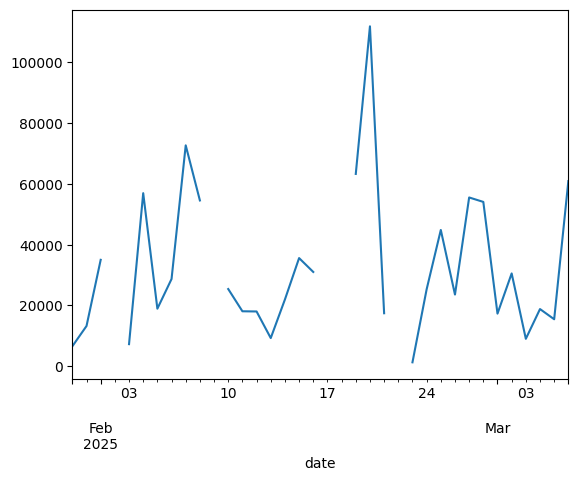

In [ ]:
short_to_vima_fa_df.index = pd.to_datetime(short_to_vima_fa_df.index)
short_to_vima_fa_df['text'].str.len().resample('D').mean().plot()

<Axes: ylabel='date'>

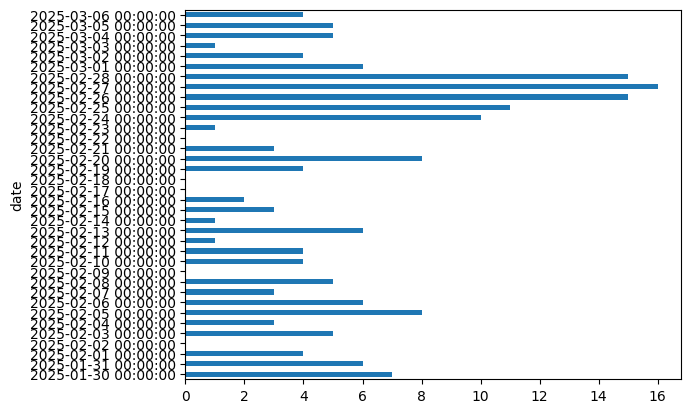

In [ ]:
short_to_vima_fa_df['text'].resample('D').count().plot(kind='barh')

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [ ]:
plt.style.use('seaborn-v0_8-bright')

In [ ]:
ax = short_to_vima_fa_df['positive'].resample('D').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_to_vima_fa_df['negative'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_to_vima_fa_df['trust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_to_vima_fa_df['disgust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_to_vima_fa_df['text'].str.len().resample('D').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()
short_to_vima_fa_df.fillna(method='ffill', inplace=True)

<ipython-input-34-3677840989>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  short_to_vima_fa_df.fillna(method='ffill', inplace=True)


In [ ]:
plt.style.use('ggplot')

<ipython-input-36-3677840989>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  short_to_vima_fa_df.fillna(method='ffill', inplace=True)


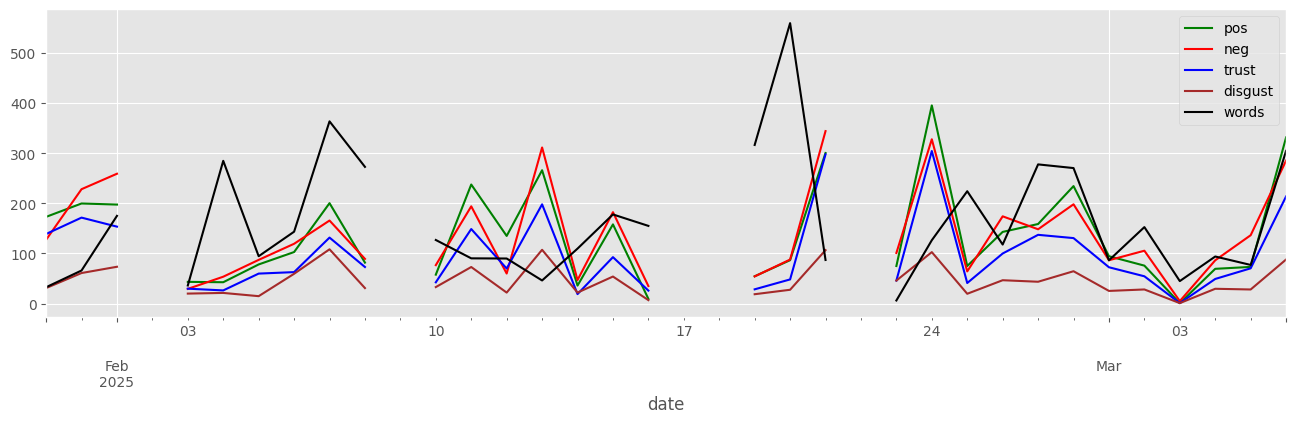

In [ ]:
ax = short_to_vima_fa_df['positive'].resample('D').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_to_vima_fa_df['negative'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_to_vima_fa_df['trust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_to_vima_fa_df['disgust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_to_vima_fa_df['text'].str.len().resample('D').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()
short_to_vima_fa_df.fillna(method='ffill', inplace=True)

In [ ]:
plt.style.use('classic')

<ipython-input-38-3677840989>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  short_to_vima_fa_df.fillna(method='ffill', inplace=True)


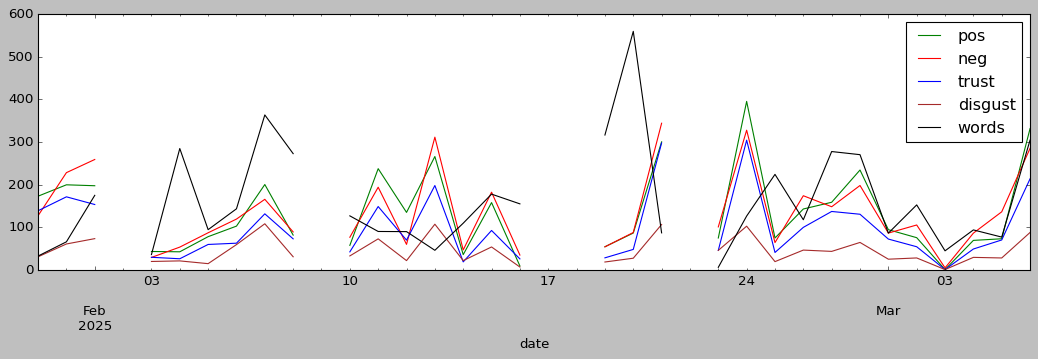

In [ ]:
ax = short_to_vima_fa_df['positive'].resample('D').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_to_vima_fa_df['negative'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_to_vima_fa_df['trust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_to_vima_fa_df['disgust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_to_vima_fa_df['text'].str.len().resample('D').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()
short_to_vima_fa_df.fillna(method='ffill', inplace=True)

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')

<Axes: xlabel='date'>

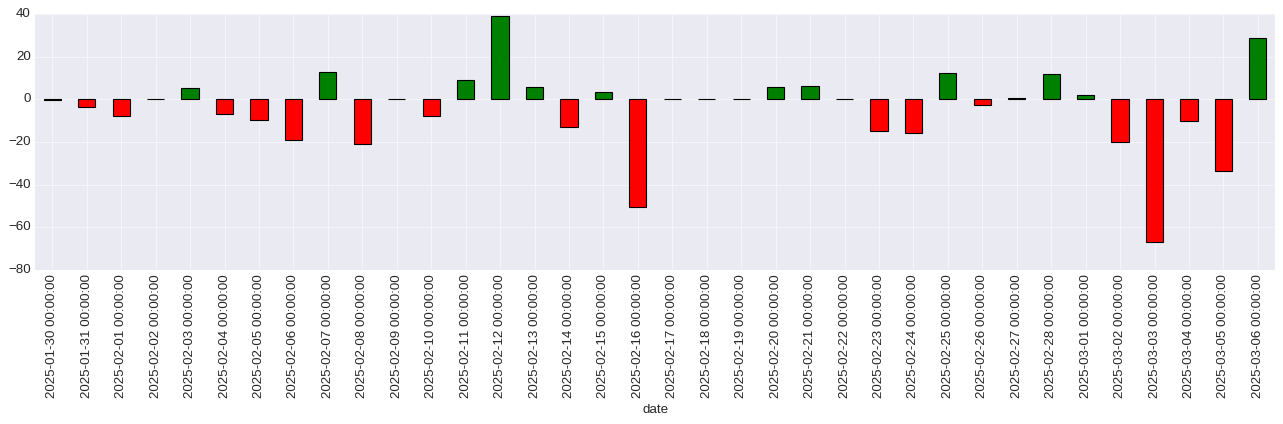

In [ ]:
short_to_vima_fa_df['(-)αρνητικότητα | θετικότητα(+)'] = short_to_vima_fa_df.positive*100//short_to_vima_fa_df[['positive','negative']].sum(
        axis=1) - short_to_vima_fa_df.negative*100//short_to_vima_fa_df[['positive','negative']].sum(axis=1)

short_to_vima_fa_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean().plot(kind='bar',
                                                                               color=(short_to_vima_fa_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(20,4))